# Exercício 1

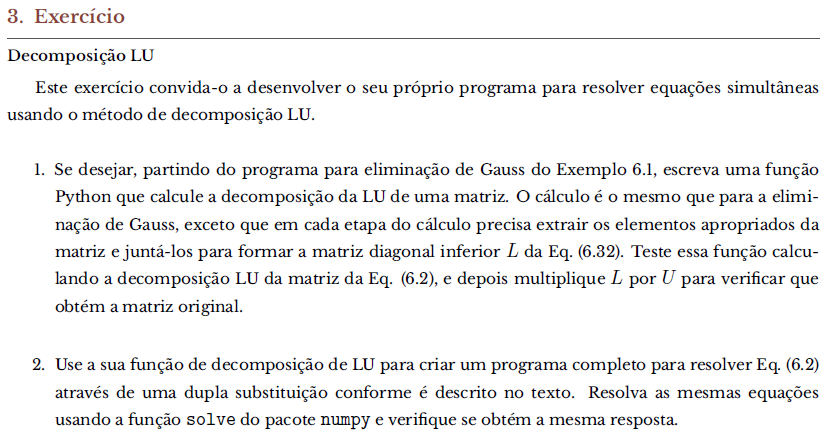
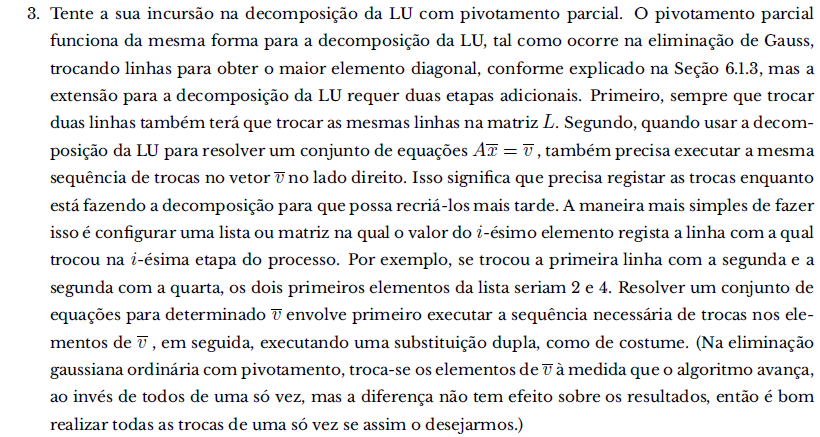
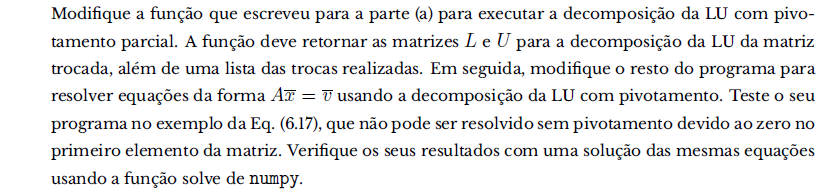

[Página do Notion](https://www.notion.so/guilhermebaos/10-Decomposi-o-LU-f67b4bf846f1473d97f1b294a2442928?pvs=4).

In [73]:
import numpy as np

## Alínea 1

In [74]:
def lu_decom(A: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    """
        Dado uma matriz A calcula a sua decomposição LU sem pivotagem.

        ### Aviso
        Tem side-effects!! Altera A.

        ### Retorno
        Devolve um tuplo da forma (L, U).
    """

    N = A.shape[0]
    L = np.zeros((N, N))

    # A matriz U eventualmente será uma matriz upper!
    U = A

    for i in range(N):
        # Criar a matriz L_i
        L_i = np.identity(N)
        L_i[i+1:, i] = -U[i+1:, i]
        L_i[i:, i] /= U[i, i]

        # Guardar a coluna i de U em L
        L[i:, i] = U[i:, i]

        # Aplicar L_i a A
        U = L_i @ U
    
    return L, U

In [75]:
A = np.array([[2, 1, 4, 1], [3, 4, -1, -1], [1, -4, 1, 5], [2, -2, 1, 3]], dtype=np.float64)
bb = np.array([-4, 3, 9, 7], dtype=np.float64)

L, U = lu_decom(np.copy(A))
print(A)
print(L @ U)


[[ 2.  1.  4.  1.]
 [ 3.  4. -1. -1.]
 [ 1. -4.  1.  5.]
 [ 2. -2.  1.  3.]]
[[ 2.  1.  4.  1.]
 [ 3.  4. -1. -1.]
 [ 1. -4.  1.  5.]
 [ 2. -2.  1.  3.]]


## Alínea 2

In [76]:
def lu_solve(A: np.ndarray, bb: np.ndarray) -> np.ndarray:
    """
        Resolve o sistema de D equações definido por A * xx = bb usando decomposição LU sem pivotagem.

        ### Retorno
        Devolve um array que contém o vetor solução.
    """

    N = len(bb)

    # Obter a decomposição LU
    L, U = lu_decom(np.copy(A))

    # Substituição progressiva -> Resolver L * yy = bb
    yy = np.zeros(N)
    yy[0] = bb[0] / L[0, 0]
    for i in range(1, N):
        yy[i] = (bb[i] - (L[i, :i] @ yy[:i])) / L[i][i]
    
    # Substituição regressiva -> Resolver U * xx = yy
    xx = np.zeros(N)
    xx[-1] = yy[-1] / U[N-1, N-1]
    for i in range(N-1, -1, -1):
        xx[i] = (yy[i] - (U[i][i+1:] @ xx[i+1:])) / U[i][i]
    
    return xx

In [77]:
print(lu_solve(A, bb))
print(np.linalg.solve(A, bb))

[ 2. -1. -2.  1.]
[ 2. -1. -2.  1.]


## Alínea 3

Tecnicamente, a função de decomposição LU abaixo não devolve a decomposição LU de $A$, mas sim a decomposição LU de $PA$, em que $P$ é a matriz associada às permutações realizadas! Isto é suficiente para resolver sistemas de equações lineares, mas não ficamos a saber a decomposição LU de $A$.

In [78]:
def troca_linhas(A: np.ndarray, mm: np.ndarray) -> np.ndarray:
    """
        Troca as linhas de A de acordo com o mapa de endereços mm.
    """

    B = np.zeros_like(A)
    for line in range(B.shape[0]):
        B[line] = np.copy(A[mm[line]])
    return B


def lu_decom(A: np.ndarray) -> tuple[np.ndarray, np.ndarray, np.ndarray]:
    """
        Dado uma matriz A calcula a sua decomposição LU usando pivotagem.

        ### Retorno
        Devolve um tuplo da forma (L, U, mm) onde mm é um array com o mapa de endereços associado à troca de linhas.
    """

    N = A.shape[0]

    # Fazer pivotagem usando um mapa de endereços
    mm = np.arange(0, N)
    for line in range(N):
        # Posição do maior elemento da coluna (tendo em conta as trocas já feitas)
        coluna = A[mm[line:], line]
        index = list(coluna).index(max(coluna)) + line

        # Trocar os elementos
        mm[line], mm[index] = mm[index], mm[line]
    

    # Abandonar o mapa de endereços porque se não o produto interno L @ U não funciona
    # Isto pois a matriz U não tem as linhas trocadas, teriamos de fazer uma função de produto interno que tivesse em conta o mapa de endereços
    B = troca_linhas(A, mm)

    L = np.zeros((N, N))
    U = B

    for i in range(N):
        # Criar a matriz L_i
        L_i = np.identity(N)
        L_i[i+1:, i] = -U[i+1:, i]
        L_i[i:, i] /= U[i, i]

        # Guardar a coluna i de U em L
        L[i:, i] = U[i:, i]

        # Aplicar L_i a A
        U = L_i @ U
    
    return L, U, mm

In [79]:
A = np.array([[2, 1, 4, 1], [3, 4, -1, -1], [1, -4, 1, 5], [2, -2, 1, 3]], dtype=np.float64)
bb = np.array([-4, 3, 9, 7], dtype=np.float64)

L, U, mm = lu_decom(A)

B = troca_linhas(A, mm)
print(B)
print(L @ U)


[[ 3.  4. -1. -1.]
 [ 2.  1.  4.  1.]
 [ 1. -4.  1.  5.]
 [ 2. -2.  1.  3.]]
[[ 3.  4. -1. -1.]
 [ 2.  1.  4.  1.]
 [ 1. -4.  1.  5.]
 [ 2. -2.  1.  3.]]


In [80]:
def lu_solve(A: np.ndarray, bb: np.ndarray) -> np.ndarray:
    """
        Resolve o sistema de D equações definido por A * xx = bb usando decomposição LU com pivotagem.

        ### Retorno
        Devolve um array que contém o vetor solução.
    """

    N = len(bb)

    # Obter a decomposição LU
    L, U, mm = lu_decom(A)
    bb = troca_linhas(bb, mm)

    # Substituição progressiva -> Resolver L * yy = bb
    yy = np.zeros(N)
    yy[0] = bb[0] / L[0, 0]
    for i in range(1, N):
        yy[i] = (bb[i] - (L[i, :i] @ yy[:i])) / L[i][i]
    
    # Substituição regressiva -> Resolver U * xx = yy
    xx = np.zeros(N)
    xx[-1] = yy[-1] / U[N-1, N-1]
    for i in range(N-1, -1, -1):
        xx[i] = (yy[i] - (U[i][i+1:] @ xx[i+1:])) / U[i][i]
    
    return xx

In [81]:
print(lu_solve(A, bb))
print(np.linalg.solve(A, bb))

[ 2. -1. -2.  1.]
[ 2. -1. -2.  1.]


In [82]:
A = np.array([[0, 1, 4, 1], [1, -4, 1, 5], [2, -2, 1, 3], [3, -6, -1, -1]], dtype=np.float64)
bb = np.array([4, 3, 9, 7], dtype=np.float64)

print(lu_solve(np.copy(A), np.copy(bb)))
print(np.linalg.solve(A, bb))

[4.66666667 1.         0.66666667 0.33333333]
[4.66666667 1.         0.66666667 0.33333333]
